In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models.elm import ELMClassifier, ELMRegressor
from models.perceptron import PerceptronClassifier
from models.rbf import RBFClassifier, RBFRegressor
from models.adaline import Adaline
from models.elm_hebbian import ELMHebbianClassifier, ELMHebbianRegressor
from experiments.evaluation import ModelEvaluationExperiment
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_boston, load_diabetes, load_iris
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [ ]:
# breast_cancer: classificaçao
X_bc, y_bc = load_breast_cancer(return_X_y = True)
y_bc = pd.Series(y_bc).map({0:-1,1:1}).to_numpy()
# digits: classificação
X_dg, y_dg = load_digits(return_X_y = True)
y_dg = pd.Series(y_dg).map(lambda x: -1 if x == 8 else 1).to_numpy()
# iris: classificação
X_ir, y_ir = load_iris(return_X_y = True)
y_ir = pd.Series(y_ir).map({0:-1,1:1,2:1}).to_numpy()
# wine: regressão
X_wn, y_wn = load_wine(return_X_y = True)
y_wn = pd.Series(y_wn).map({0:-1,1:1,2:1}).to_numpy()
# boston: regressão
X_bo, y_bo = load_boston(return_X_y = True)
# diabetes: regressão
X_di, y_di = load_diabetes(return_X_y = True)


In [ ]:
# Normalization
X_bc = MinMaxScaler().fit_transform(X_bc)
X_dg = MinMaxScaler().fit_transform(X_dg)
X_ir = MinMaxScaler().fit_transform(X_ir)
X_wn = MinMaxScaler().fit_transform(X_wn)
X_bo = MinMaxScaler().fit_transform(X_bo)
X_di = MinMaxScaler().fit_transform(X_di)


In [64]:
# Classification
models_classification = []
models_classification.append(('Perceptron', PerceptronClassifier(max_epochs=100), None))
models_classification.append(('ELM', ELMClassifier(p=15), np.linspace(0,10,100))) 
models_classification.append(('ELMHebbian', ELMHebbianClassifier(p=15), None)) 
#models_classification.append(('RBF', RBFClassifier(p=15), np.linspace(0,1,20)))

datasets_classification = []
datasets_classification.append(('Breast Cancer', (X_bc, y_bc)))
datasets_classification.append(('Digitis (8)', (X_dg, y_dg)))
datasets_classification.append(('Iris', (X_ir, y_ir)))

# Regression
models_regression = []
models_regression.append(('Adaline', Adaline(max_epochs=200), None))
models_regression.append(('ELM', ELMRegressor(p=15),np.linspace(0,0.01,100)))
#models_regression.append(('RBF', RBFRegressor(p=10)))

datasets_regression = []
datasets_regression.append(('Wine', (X_wn, y_wn)))
datasets_regression.append(('Boston Housing', (X_bo, y_bo)))
datasets_regression.append(('Diabetes', (X_di, y_di)))



In [65]:
experiment_regression = ModelEvaluationExperiment(datasets_regression, 'regression')
experiment_regression.start(models_regression)


 50%|█████     | 1/2 [00:00<00:00,  2.61it/s]

100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

 50%|█████     | 1/2 [00:00<00:00,  3.00it/s]

100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

 50%|█████     | 1/2 [00:00<00:00,  3.07it/s]

100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

 50%|█████     | 1/2 [00:00<00:00,  3.13it/s]

100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

 50%|█████     | 1/2 [00:00<00:00,  3.10it/s]

100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

 50%|█████     | 1/2 [00:00<00:00,  2.81it/s]

100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

 50%|█████     | 1/2 [00:00<00:00,  3.04it/s]

100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

 50%|█████     | 1/2 [00:00<00:00,  2.95it/s]

100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

 50%|█████     | 1/2 [00:00<00:00,  2.84it/s]

100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

 50%|█████     | 1/2 [00:00<00:00,  2.97it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.76it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 10

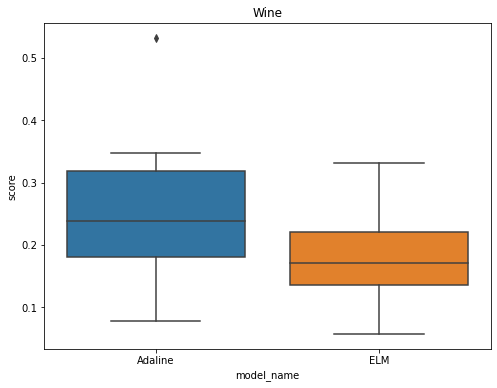

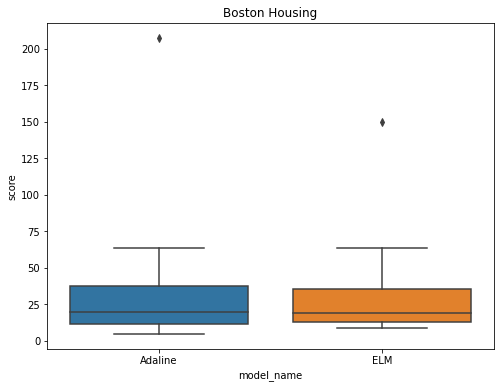

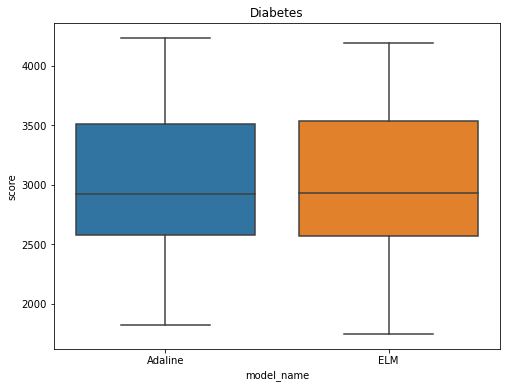

In [66]:
experiment_regression.plot_final_scores()

In [ ]:
experiment_classification = ModelEvaluationExperiment(datasets_classification,'classification')
experiment_classification.start(models_classification)


In [ ]:
#experiment_classification.plot_tuning_curves()

In [ ]:
experiment_classification.plot_final_scores()

In [ ]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(X_bc, y_bc, test_size=0.3, shuffle=True)
opt, scores = experiment_classification.tune_model(X_t1, X_t2, y_t1, y_t2, ELMClassifier(p=5), np.linspace(0,0.001,1000))

plt.plot(scores[:,0], scores[:,1])